In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv("Housing.csv")
df

Matplotlib is building the font cache; this may take a moment.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [70]:
duplicates = df.duplicated()
for index, is_duplicate in duplicates.items():
    if is_duplicate:
        print(f"Index: {index}, Duplicate: {is_duplicate}")

In [71]:
nan_data = df.isnull().sum()
print(nan_data)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [72]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [73]:
selected_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'parking', 'prefarea']
unique_values_selected = df[selected_columns].apply(lambda col: col.unique())
print(unique_values_selected)

mainroad              [yes, no]
guestroom             [no, yes]
basement              [no, yes]
hotwaterheating       [no, yes]
airconditioning       [yes, no]
parking            [2, 3, 0, 1]
prefarea              [yes, no]
dtype: object


In [93]:
type_mapping = {
    'mainroad': {'yes': True, 'no': False},
    'guestroom': {'yes': True, 'no': False},
    'basement': {'yes': True, 'no': False},
    'hotwaterheating': {'yes': True, 'no': False},
    'airconditioning': {'yes': True, 'no': False},
    'parking': {'2': 2, '3': 3, '0': 0, '1': 1},
    'prefarea': {'yes': True, 'no': False},
}
for col, mapping in type_mapping.items():
    df[col] = df[col].replace(mapping).astype(type(next(iter(mapping.values()))))
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad              bool
guestroom             bool
basement              bool
hotwaterheating       bool
airconditioning       bool
parking              int64
prefarea              bool
furnishingstatus    object
dtype: object


In [75]:
X = df.drop('price', axis=1)  # wszystkie kolumny oprócz 'price'
y = df['price'] 

In [76]:
X = pd.get_dummies(X)
print(X)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3      True      False     False   
1    8960         4          4        4      True      False     False   
2    9960         3          2        2      True      False      True   
3    7500         4          2        2      True      False      True   
4    7420         4          1        2      True       True      True   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1      True      False      True   
541  2400         3          1        1     False      False     False   
542  3620         2          1        1      True      False     False   
543  2910         3          1        1     False      False     False   
544  3850         3          1        2      True      False     False   

     hotwaterheating  airconditioning  parking  prefarea  \
0              False             True        2     

In [77]:
#podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
model = LinearRegression()

# Dopasowanie model do danych treningowych
model.fit(X_train, y_train)

# Prognoza na zestawie testowym
y_pred = model.predict(X_test)

# Ocena model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1523019469501.2915


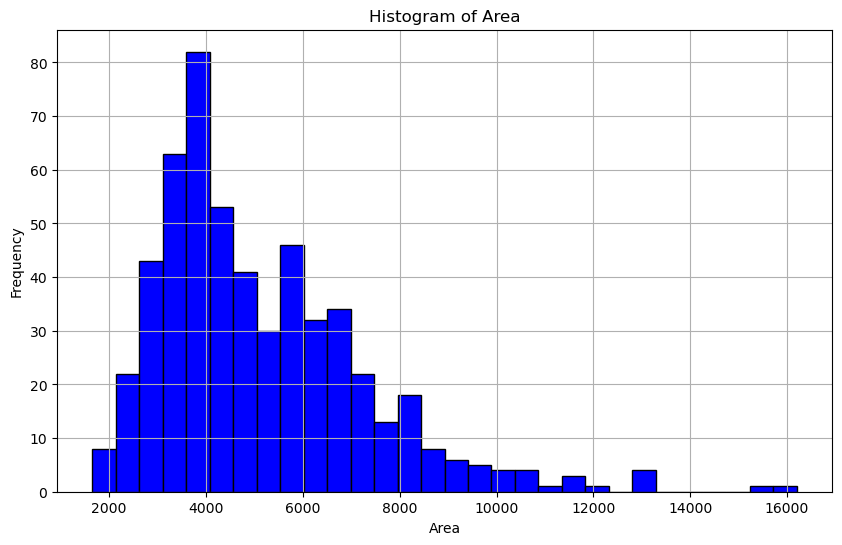

In [82]:
area_data = df['area']

# Tworzenie histogramu dla kolumny 'area'
plt.figure(figsize=(10, 6))
plt.hist(area_data, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()